Gen 0
Gen 50
Gen 100
Gen 150
Gen 200
Gen 250
Gen 300
Gen 350
Gen 400
Gen 450
Gen 500
Gen 550
Gen 600
Gen 650
Gen 700
Gen 750
Gen 800
Gen 850
Gen 900
Gen 950
Gen 1000
Gen 1050
Gen 1100
Gen 1150
Gen 1200
Gen 1250
Gen 1300
Gen 1350
Gen 1400
Gen 1450
Gen 1500
Gen 1550
Gen 1600
Gen 1650
Gen 1700
Gen 1750
Gen 1800
Gen 1850
Gen 1900
Gen 1950
Gen 2000
Gen 2050
Gen 2100
Gen 2150
Gen 2200
Gen 2250
Gen 2300
Gen 2350
Gen 2400
Gen 2450
Gen 2500
Gen 2550
Gen 2600
Gen 2650
Gen 2700
Gen 2750
Gen 2800
Gen 2850
Gen 2900
Gen 2950
Gen 3000
Gen 3050
Gen 3100
Gen 3150
Gen 3200
Gen 3250
Gen 3300
Gen 3350
Gen 3400
Gen 3450
Gen 3500
Gen 3550
Gen 3600
Gen 3650
Gen 3700
Gen 3750
Gen 3800
Gen 3850
Gen 3900
Gen 3950
Gen 4000
Gen 4050
Gen 4100
Gen 4150
Gen 4200
Gen 4250
Gen 4300
Gen 4350
Gen 4400
Gen 4450
Gen 4500
Gen 4550
Gen 4600
Gen 4650
Gen 4700
Gen 4750
Gen 4800
Gen 4850
Gen 4900
Gen 4950
Gen 5000
Gen 5050
Gen 5100
Gen 5150
Gen 5200
Gen 5250
Gen 5300
Gen 5350
Gen 5400
Gen 5450
Gen 5500
Gen 5550
Gen 5600
Gen 56

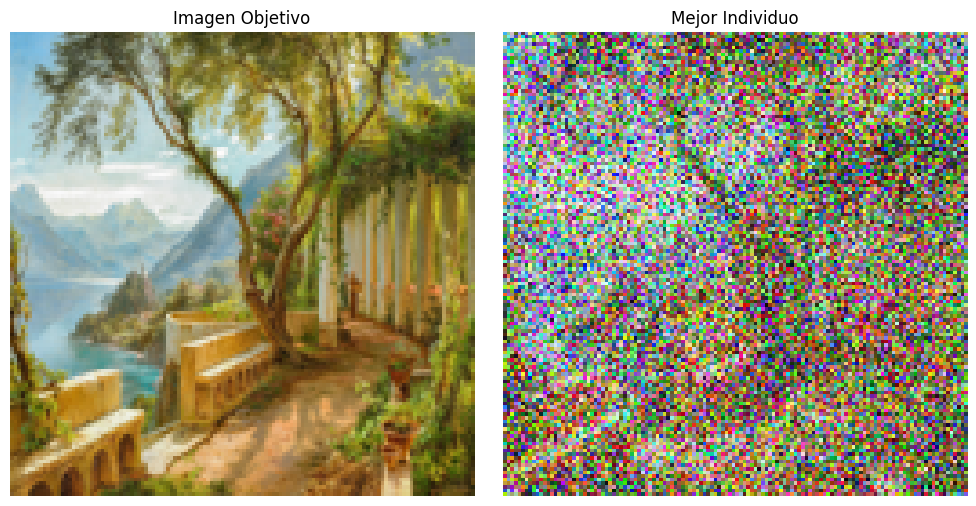

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import random

# ---------- Configuración ----------
POP_SIZE = 50
IMG_SHAPE = (128, 128, 3)  # Redimensionada a 129x256
MUTATION_RATE = 0.001
MAX_GENERATIONS = 120000  # Puedes reducirlo para pruebas más rápidas

# ---------- Función para cargar y redimensionar la imagen objetivo ----------
def load_and_resize_target(image_path):
    img = Image.open(image_path)
    img = img.resize((IMG_SHAPE[1], IMG_SHAPE[0]))  # Redimensionamos a 129x256
    return np.array(img)

# ---------- Funciones de utilidad ----------
def random_individual():
    return np.random.randint(0, 256, IMG_SHAPE, dtype=np.uint8)

def fitness(ind):
    return -np.sum(np.abs(ind.astype(np.int32) - target.astype(np.int32)))

def crossover(p1, p2):
    mask = np.random.rand(*IMG_SHAPE[:2]) < 0.5
    mask = np.stack([mask] * 3, axis=-1)
    return np.where(mask, p1, p2)

def mutate(ind):
    mutation_mask = np.random.rand(*IMG_SHAPE) < MUTATION_RATE
    random_vals = np.random.randint(0, 256, IMG_SHAPE, dtype=np.uint8)
    ind[mutation_mask] = random_vals[mutation_mask]
    return ind

# ---------- Cargar y redimensionar la imagen objetivo ----------
image_path = "imagen.jpg"  # Cambia esta ruta por la de tu imagen
target = load_and_resize_target(image_path)

# ---------- Inicializar población ----------
population = [random_individual() for _ in range(POP_SIZE)]

# ---------- Evolución ----------
best_ind = None
best_fit = -np.inf

for gen in range(MAX_GENERATIONS):
    fits = [fitness(ind) for ind in population]
    best_idx = int(np.argmax(fits))

    if fits[best_idx] > best_fit:
        best_fit = fits[best_idx]
        best_ind = population[best_idx].copy()

    if gen % 50 == 0:
        print(f"Gen {gen}")

    if best_fit == 0:
        print(f"Imagen objetivo alcanzada en generación {gen}")
        break

    new_pop = []
    for _ in range(POP_SIZE):
        a, b = random.sample(population, 2)
        winner = a if fitness(a) > fitness(b) else b
        new_pop.append(winner)

    children = []
    for i in range(0, POP_SIZE, 2):
        p1 = new_pop[i]
        p2 = new_pop[(i + 1) % POP_SIZE]
        children.append(mutate(crossover(p1, p2)))
        children.append(mutate(crossover(p2, p1)))

    population = children[:POP_SIZE]

# ---------- Mostrar resultados ----------
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(target)
axs[0].set_title("Imagen Objetivo")
axs[0].axis('off')

axs[1].imshow(best_ind)
axs[1].set_title("Mejor Individuo")
axs[1].axis('off')

plt.tight_layout()
plt.show()
